In [305]:
%reset -f
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import figurefirst as fifi
plt.style.use('default')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot vectors according to fly-wind coordinate frame
![fly_coordinate_system.png](../img/fly_coordinate_system.png)

# Specify heading, ground speed + direction, & ambient wind speed + direction

In [306]:
phi = np.pi/3  # heading [rad]

In [307]:
g = 0.4  # ground velocity magnitude
psi = np.pi/10 # ground velocity direction [rad]

In [308]:
w = 0.3  # ambient wind velocity magnitude
zeta = -np.pi/4 # ambient wind velocity direction [rad]

# Compute apparent wind

In [309]:
# Ground velocity in fly frame
v_para = g * np.cos(psi)  # parallel ground velocity in fly frame
v_perp = g * np.sin(psi)  # perpendicular ground velocity in fly frame

# Airspeed velocity in fly frame
a_para = v_para - w * np.cos(phi - zeta)  # parallel apparent wind velocity in fly frame
a_perp = v_perp + w * np.sin(phi - zeta)  # perpendicular apparent wind velocity in fly frame
a = np.sqrt(a_para**2 + a_perp**2)  # apparent wind magnitude
gamma = np.arctan2(a_perp, a_para)  # apparent wind angle [rad]

# Print calculated variables
print('v_para:', v_para)
print('v_perp:', v_perp)
print('')

print('a_para:', a_para)
print('a_perp:', a_perp)
print('a:', a)
print('gamma:', np.rad2deg(gamma), 'deg')

v_para: 0.3804226065180614
v_perp: 0.12360679774997896

a_para: 0.4580683200488176
a_perp: 0.41338454563669946
a: 0.6170197471747614
gamma: 42.06472761914798 deg


# Compute x & y components in global frame for plotting

In [310]:
# Ground velocity in global frame
psi_global = phi + psi  # direction of travel in global frame
g_x = g * np.cos(psi_global)  # x-velocity in global frame
g_y = g * np.sin(psi_global)  # y-velocity in global frame

# Ambient wind velocity in global frame
w_x = w * np.cos(zeta)  # ambient wind x in global frame
w_y = w * np.sin(zeta)  # ambient wind y in global frame

# Air velocity in global frame
a_x = g_x - w_x  # airspeed x in global frame
a_y = g_y - w_y  # airspeed y in global frame
# a_test = np.sqrt(a_x**2 + a_y**2)
# a_test

# Vector for heading, make same length as ground speed
phi_x = g * np.cos(phi)  # heading x
phi_y = g * np.sin(phi)  # heading y

# Plot vector map

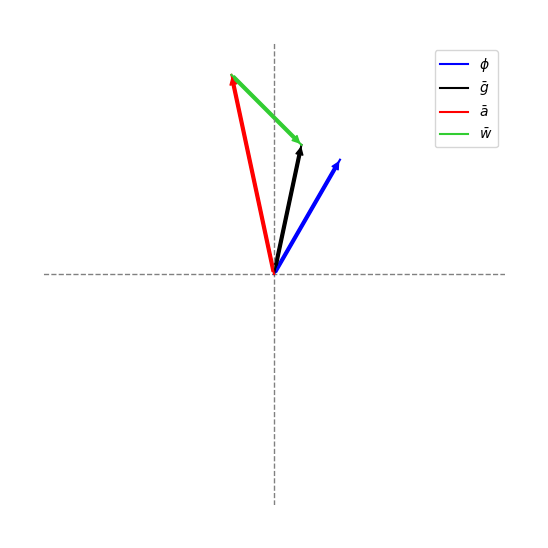

In [311]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)

fly_cord = np.array([0.0, 0.0])

lw = 1.5
alpha = 1.0



# plot axes
axis_size = 0.7
ax.plot([axis_size, -axis_size], [0, 0], '--', linewidth=1.0, color='gray')
ax.plot([0.0, 0.0], [-axis_size,axis_size], '--', linewidth=1.0, color='gray')

# Plot fly-wind vectors
phi_color = 'blue'
g_color = 'black'
a_color = 'red'
w_color = 'limegreen'

ax.plot([fly_cord[0], fly_cord[0] + phi_x], [fly_cord[1], fly_cord[1] + phi_y], '-', linewidth=lw, color=phi_color, alpha=alpha, label='$\phi$')
ax.plot([fly_cord[0], fly_cord[0] + g_x], [fly_cord[1], fly_cord[1] + g_y], '-', linewidth=lw, color=g_color, alpha=alpha, label=r'$\bar{g}$')
ax.plot([fly_cord[0], fly_cord[0] + a_x], [fly_cord[1], fly_cord[1] + a_y], '-', linewidth=lw, color=a_color, alpha=alpha, label=r'$\bar{a}$')
ax.plot([fly_cord[0] + a_x, fly_cord[0] + w_x + a_x], [fly_cord[1] + a_y, fly_cord[1] + w_y + a_y], '-', linewidth=lw, color='limegreen', alpha=alpha, label=r'$\bar{w}$')
# ax.plot([fly_cord[0], w_x], [fly_cord[1], w_y], '-', linewidth=lw, color='limegreen', alpha=alpha)

# Plot arrows
mutation_scale = 10

arrow_phi = FancyArrowPatch(posA=fly_cord, posB=fly_cord + (phi_x, phi_y), mutation_scale=mutation_scale, color=phi_color)
ax.add_patch(arrow_phi)

arrow_g = FancyArrowPatch(posA=fly_cord, posB=fly_cord + (g_x, g_y), mutation_scale=mutation_scale, color=g_color)
ax.add_patch(arrow_g)

arrow_a = FancyArrowPatch(posA=fly_cord, posB=fly_cord + (a_x, a_y), mutation_scale=mutation_scale, color=a_color)
ax.add_patch(arrow_a)

arrow_w = FancyArrowPatch(posA=fly_cord + (a_x, a_y), posB=fly_cord + (w_x + a_x, w_y + a_y), mutation_scale=mutation_scale, color=w_color)
ax.add_patch(arrow_w)

# Set axis properties
ax.set_aspect(1)
ax.autoscale()

ax.set_xlim(-axis_size, axis_size)
ax.set_ylim(-axis_size, axis_size)

ax.legend()

fifi.mpl_functions.adjust_spines(ax, [])